In [1]:
# All dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Base settings and reads.
pd.set_option("display.max_rows", None, "display.max_columns", None)
offense = pd.read_csv("created_csvs/offense.csv").drop(columns=['Unnamed: 0','Games.1'])
adv_offense = pd.read_csv("created_csvs/adv_offense.csv").drop(columns=['Unnamed: 0'])
# Sets consistent order for teams when pulling from team offense. 
offense = offense.sort_values("Team")
offense = offense.reset_index()

In [2]:
# Creates analysis DataFrame.
calculations = pd.DataFrame(offense["Team"])
# Prints columns.
print(adv_offense.columns)
adv_offense.dtypes

Index(['Team', 'Games', '3rd Down Attempts', '3rd Down Conversions',
       '3rd Down Percentage', '4th Down Attempts', '4th Down Conversions',
       '4th Down Percentage', 'Red Zone Attempts', 'Red Zone TDs',
       'Red Zone Percentage', 'Drives', 'Average Start', 'Average Time',
       'Average Points'],
      dtype='object')


Team                    object
Games                    int64
3rd Down Attempts        int64
3rd Down Conversions     int64
3rd Down Percentage     object
4th Down Attempts        int64
4th Down Conversions     int64
4th Down Percentage     object
Red Zone Attempts        int64
Red Zone TDs             int64
Red Zone Percentage     object
Drives                   int64
Average Start           object
Average Time            object
Average Points          object
dtype: object

In [3]:
# Percentage of Yards Passing
calculations["Air %"] = round(100 * (offense["Passing Yards"] / offense["Yards"]),2)
# Percentage of Yards Rushing
calculations["Ground %"] = round(100 * (offense["Rushing Yards"] / offense["Yards"]),2)
# Yards, Points, QBR
calculations["Sacks"] = offense["Sacks"].astype("int64")
calculations["Points"] = offense["Points"]
calculations["Passing TDs"] = offense["Passing TDs"]
calculations["Rushing TDs"] = offense["Rushing TDs"]
calculations["QBR"] = offense["QBR"]
# ------------------------- ALL COLUMN ADDITIONS NEED TO HAPPEN ABOVE THIS LINE ---------------------------
# Sorting 
calculations = calculations.sort_values("Passing TDs", ascending=False)
# Displays
calculations

,Team,Air %,Ground %,Sacks,Points,Passing TDs,Rushing TDs,QBR
11,Green Bay Packers,65.97,34.03,21,509,48,16,121.5
29,Tampa Bay Buccaneers,75.28,24.72,22,492,42,16,102.8
15,Kansas City Chiefs,72.96,27.04,24,473,40,13,107.3
3,Buffalo Bills,72.84,27.16,27,501,40,16,107.6
28,Seattle Seahawks,66.66,33.34,48,459,40,15,105.0
26,Pittsburgh Steelers,74.77,25.23,14,416,35,12,93.5
20,Minnesota Vikings,63.72,36.28,39,430,35,20,105.0
30,Tennessee Titans,57.59,42.41,25,491,33,26,105.9
12,Houston Texans,75.58,24.42,50,384,33,10,112.3
17,Los Angeles Chargers,70.82,29.18,34,384,31,12,97.0


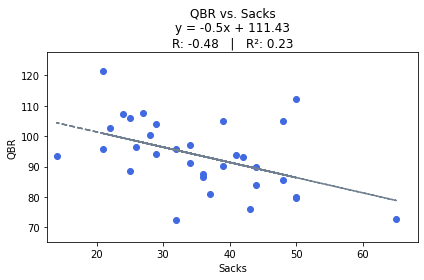

In [4]:
# Sets x and y values for scatterplot.
x = "Sacks"
y = "QBR"

# Pulls the two columns to plot.
x_values = calculations[x]
y_values = calculations[y]

# Function to calculate values and plot scatter.
def scatter_w_regression_line(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r = rvalue
    r_squared = r*r
    
    # Plotting 
    plt.scatter(x_values, y_values,color='royalblue')
    plt.plot(x_values, regression_line, "--", color='slategrey')
    
    # Calculating plot limits to position annotation.
    plt.xlim((min(x_values)*.9),(max(x_values)*1.05))
    plt.ylim((min(y_values)*.9),(max(y_values)*1.05))

    # Labels
    plt.ylabel(f"{y}")
    plt.xlabel(f"{x}")
    plt.title(f"{y} vs. {x}\n{equation}\nR: {round(r,2)}   |   R{(chr(0x00B2))}: {round(r_squared,2)}")
    
    # Saves chart to scatter folder.
    plt.tight_layout()
    
#-------------------UNCOMMENT THE BELOW LINE TO SAVE A PNG OF THE SCATTERPLOT OUTPUT-----------------------
    #plt.savefig(f"001_analysis_scatters/{y}_vs_{x}.png", pad_inches=0.5)
    
# Calls function that plots scatter.
scatter_w_regression_line(x_values, y_values)